<a href="https://colab.research.google.com/github/aljoharas/IT326/blob/main/phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
df = pd.read_csv('https://raw.githubusercontent.com/aljoharas/IT326/refs/heads/main/Dataset/pollution%20dataset.csv')


In [3]:
import pandas as pd
import numpy as np

print("Sample of raw data before cleaning:")
print(df.head())

df.replace(['?', '-', 'N/A', 'null', 'NaN'], np.nan, inplace=True)

print("\nMissing values before handling:\n", df.isnull().sum())

for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

print("\nMissing values after handling:\n", df.isnull().sum())

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df = remove_outliers(df, col)

print("\nData after removing outliers.")

print("\nDuplicate rows before removal:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("\nDuplicate rows after removal:", df.duplicated().sum())

df.to_csv("cleaned_data.csv", index=False)
print("\nCleaned data saved as 'cleaned_data.csv'")

print("\nSample of cleaned data:")
print(df.head())


Sample of raw data before cleaning:


NameError: name 'df' is not defined

# **Summary of Raw Data**

### Statistical Measures:


In [ ]:
statistical_measures = df.describe(percentiles=[.25, .5, .75]).transpose()

# To get min, Q1, median, Q3, max:
statistical_measures = statistical_measures[['min', '25%', '50%', '75%', 'max']]

statistical_measures.columns = ['Min', 'Q1', 'Median', 'Q3', 'Max']

# Display the results
print(statistical_measures)


                                  Min      Q1  Median       Q3     Max
Temperature                     13.40   25.10   29.00   34.000   58.60
Humidity                        36.00   58.30   69.80   80.300  128.10
PM2.5                            0.00    4.60   12.00   26.100  295.00
PM10                            -0.20   12.30   21.70   38.100  315.80
NO2                              7.40   20.10   25.30   31.900   64.90
SO2                             -6.20    5.10    8.00   13.725   44.90
CO                               0.65    1.03    1.41    1.840    3.72
Proximity_to_Industrial_Areas    2.50    5.40    7.90   11.100   25.80
Population_Density             188.00  381.00  494.00  600.000  957.00


# **Variables Distribution**


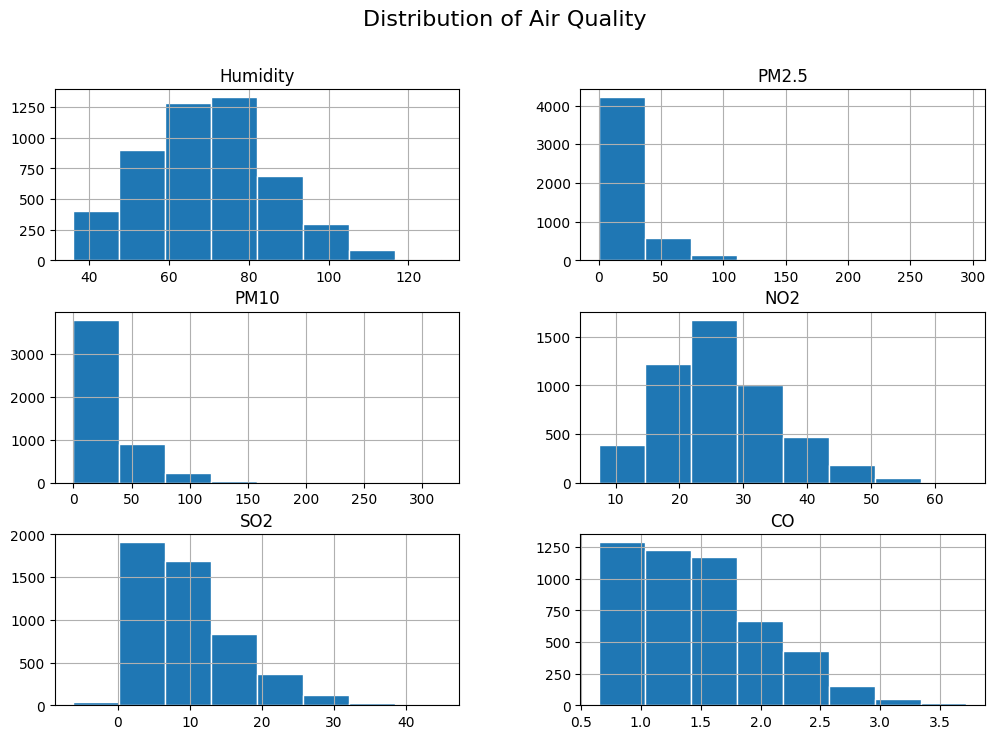

In [ ]:


columns_to_plot = ['Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO']

df[columns_to_plot].hist(bins=8, edgecolor='white', figsize=(12, 8))

plt.suptitle('Distribution of Air Quality', fontsize=16)
plt.show()

**This histogram shows the distribution of numeric values. Each plot represents the frequency of different values for variables like humidity, PM2.5, NO2, etc.**

In [4]:
plt.figure(figsize=(12, 8))
df['Air Quality'].hist(edgecolor='black', color='#00008B')
plt.title('Distribution of Air Quality levels')
plt.xlabel('Air Quality category')
plt.ylabel('Frequency')
plt.show()

NameError: name 'plt' is not defined

**This histogram shows the distribution of the class label.
It represents the number of records for a specific air quality category (e.g., "Good", "Moderate", "Hazardous", "Poor").**